In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

metrics = ["R^2 Score", "MAE", "MSE", "RMSE", "Precision", "Recall", "NDCG@10"]
models = {
    "Model 1": [0.4452, 0.1217, 0.0263, 0.1621, 0.6199, 0.9309, 1.0000],
    "Model 2": [0.4637, 0.1192, 0.0255, 0.1596, 0.6020, 0.9477, 1.0000],
    "Model 3": [0.4849, 0.1184, 0.0242, 0.1556, 0.6555, 0.9182, 1.0000],
    "Model 4": [0.4667, 0.1214, 0.0251, 0.1583, 0.6486, 0.9138, 1.0000],
    "Model 5": [0.4953, 0.1158, 0.0237, 0.1540, 0.6180, 0.9458, 1.0000],
}

df = pd.DataFrame(models, index=metrics).T
print(df)


         R^2 Score     MAE     MSE    RMSE  Precision  Recall  NDCG@10
Model 1     0.4452  0.1217  0.0263  0.1621     0.6199  0.9309      1.0
Model 2     0.4637  0.1192  0.0255  0.1596     0.6020  0.9477      1.0
Model 3     0.4849  0.1184  0.0242  0.1556     0.6555  0.9182      1.0
Model 4     0.4667  0.1214  0.0251  0.1583     0.6486  0.9138      1.0
Model 5     0.4953  0.1158  0.0237  0.1540     0.6180  0.9458      1.0


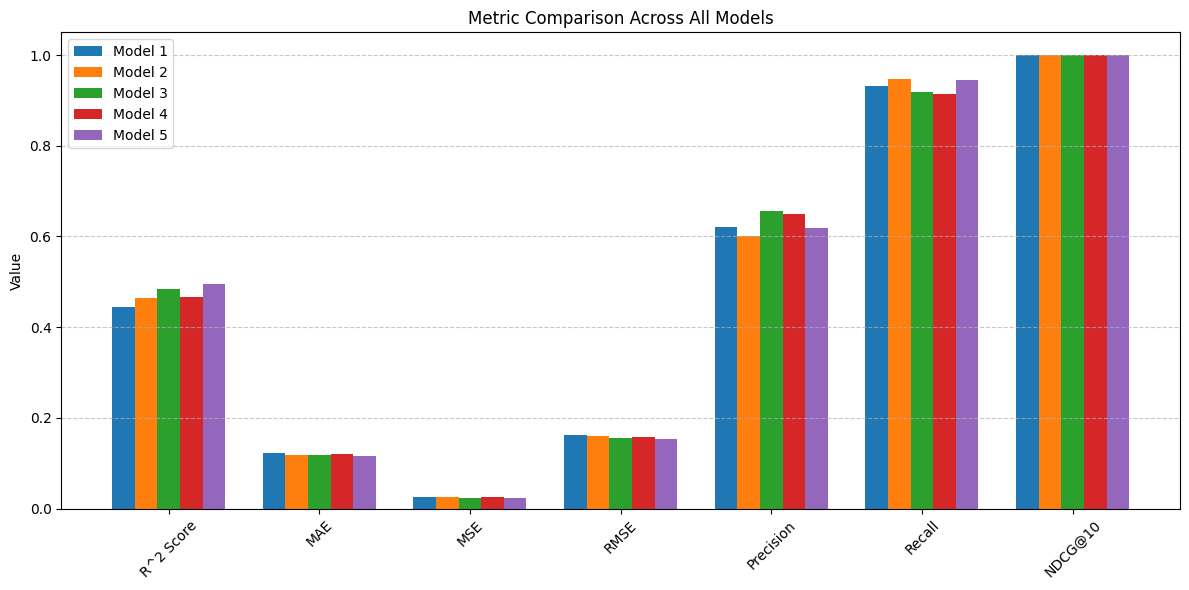

In [13]:
x = np.arange(len(metrics))
width = 0.15

plt.figure(figsize=(12, 6))
for i, (model, values) in enumerate(models.items()):
    plt.bar(x + i*width - width*2, values, width=width, label=model)

plt.xticks(x, metrics, rotation=45)
plt.ylabel("Value")
plt.title("Metric Comparison Across All Models")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

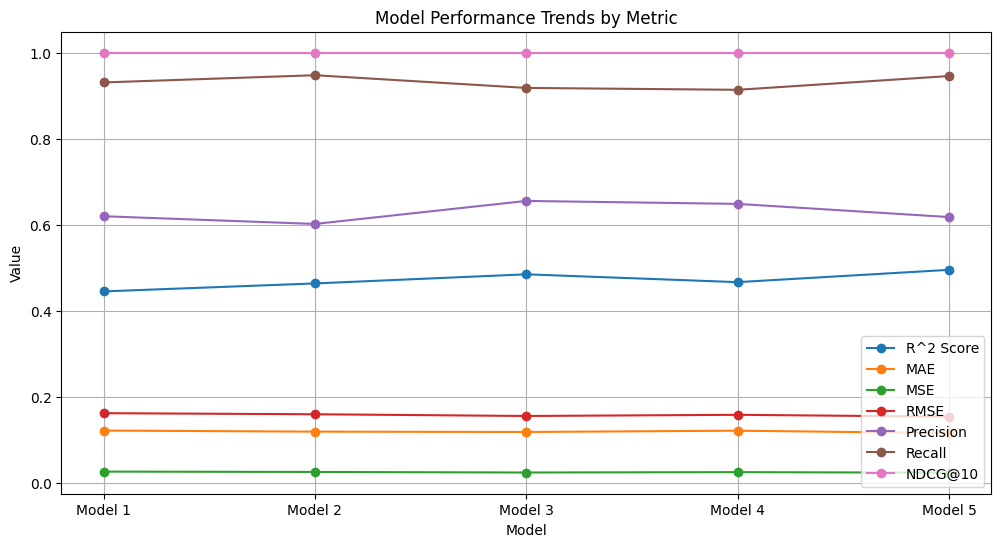

In [14]:
import pandas as pd

df = pd.DataFrame(models).T
df.columns = metrics

plt.figure(figsize=(12, 6))
for metric in df.columns:
    plt.plot(df.index, df[metric], marker='o', label=metric)

plt.title("Model Performance Trends by Metric")
plt.ylabel("Value")
plt.xlabel("Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


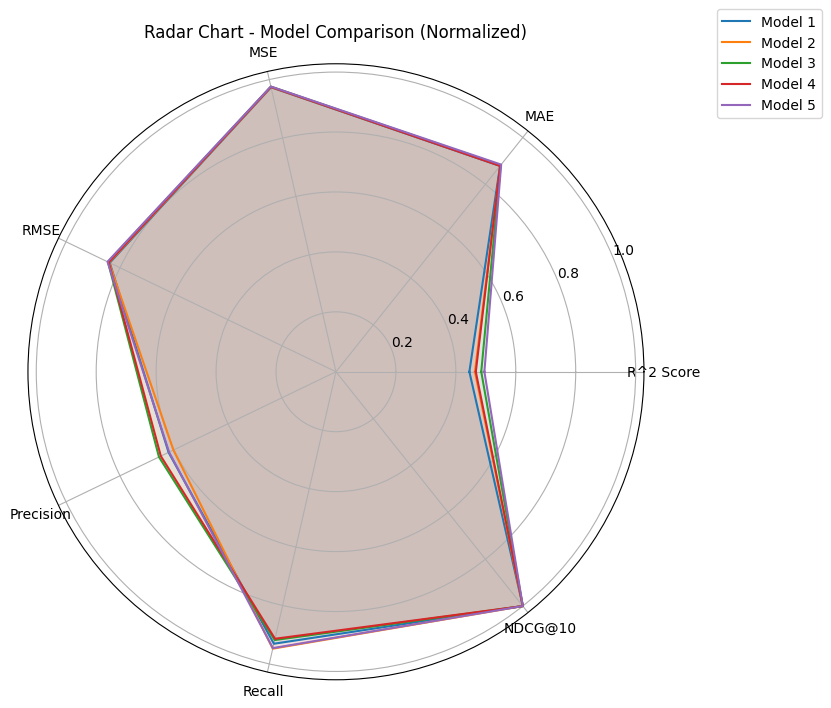

In [15]:
from math import pi

def normalize(values):
    return [
        values[0],            # R2
        1 - values[1],        # MAE
        1 - values[2],        # MSE
        1 - values[3],        # RMSE
        values[4],            # Precision
        values[5],            # Recall
        values[6],            # NDCG
    ]

categories = metrics
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for model, values in models.items():
    vals = normalize(values)
    vals += vals[:1]  
    ax.plot(angles, vals, label=model)
    ax.fill(angles, vals, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Radar Chart - Model Comparison (Normalized)")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


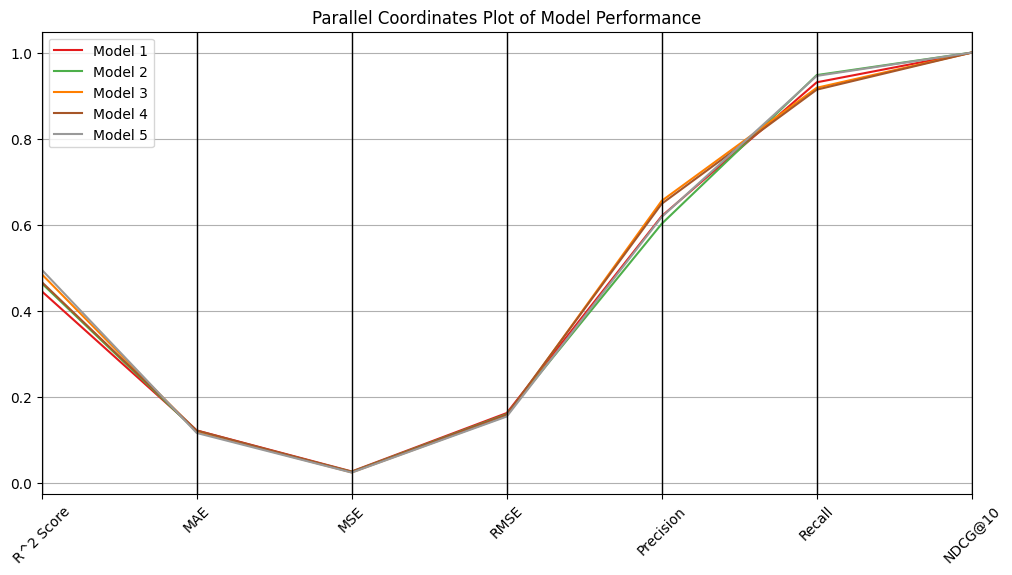

In [16]:
from pandas.plotting import parallel_coordinates

df_plot = df.reset_index().rename(columns={'index': 'Model'})

plt.figure(figsize=(12, 6))
parallel_coordinates(df_plot, class_column='Model', colormap=plt.get_cmap("Set1"))
plt.xticks(rotation=45)
plt.title("Parallel Coordinates Plot of Model Performance")
plt.legend(loc="best")
plt.show()
